In [1]:
import tensorflow as tf
import keras
from keras import layers,models
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

c:\Users\mhatr\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_train=pd.read_csv("/DL/LP-IV-datasets/MNIST/mnist_train.csv")
print(df_train.shape)

image_data=df_train.iloc[:,1:].values
label_data=df_train.iloc[:,0].values

output_folder="images"
os.makedirs(output_folder,exist_ok=True)
output_folder="images/train"
os.makedirs(output_folder,exist_ok=True)

num_range=300

for i in range(num_range):
    pixel_values=image_data[i,:].reshape(28,28)
    label=label_data[i]

    label_folder=os.path.join(output_folder,str(label))
    os.makedirs(label_folder,exist_ok=True)

    pic_image=os.path.join(label_folder,f"index_{i}.png")
    plt.imsave(pic_image,pixel_values,cmap='gray')

(60000, 785)


In [3]:
df_test=pd.read_csv("/DL/LP-IV-datasets/MNIST/mnist_train.csv")
print(df_test.shape)

image_data=df_test.iloc[:,1:].values
label_data=df_test.iloc[:,0].values

output_folder="images"
os.makedirs(output_folder,exist_ok=True)
output_folder="images/test"
os.makedirs(output_folder,exist_ok=True)

num_range=300

for i in range(num_range):
    pixel_values=image_data[i,:].reshape(28,28)
    label=label_data[i]

    label_folder=os.path.join(output_folder,str(label))
    os.makedirs(label_folder,exist_ok=True)

    pic_image=os.path.join(label_folder,f"index_{i}.png")
    plt.imsave(pic_image,pixel_values,cmap='gray')

(60000, 785)


In [4]:
train_datagen=ImageDataGenerator(
    rescale=1/255
)

test_datagen=ImageDataGenerator(
    rescale=1/255
)

In [5]:
train_dir='/DL/images/train/'
test_dir='/DL/images/test/'

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(28,28),
    class_mode="categorical",
    color_mode='grayscale',
    batch_size=100
)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(28,28),
    class_mode="categorical",
    color_mode='grayscale',
    batch_size=100
)

Found 573 images belonging to 10 classes.
Found 565 images belonging to 10 classes.


In [6]:
x_train,y_train=train_generator[0]
x_test,y_test=test_generator[0]

In [11]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               692352    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [12]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50


4/4 [==============================] - 1s 71ms/step - loss: 2.3003 - accuracy: 0.2100 - val_loss: 2.2920 - val_accuracy: 0.1400
Epoch 2/50
4/4 [==============================] - 0s 24ms/step - loss: 2.0146 - accuracy: 0.3300 - val_loss: 2.2721 - val_accuracy: 0.2100
Epoch 3/50
4/4 [==============================] - 0s 24ms/step - loss: 1.8606 - accuracy: 0.4200 - val_loss: 2.2067 - val_accuracy: 0.3000
Epoch 4/50
4/4 [==============================] - 0s 24ms/step - loss: 1.6943 - accuracy: 0.5000 - val_loss: 2.2158 - val_accuracy: 0.2600
Epoch 5/50
4/4 [==============================] - 0s 23ms/step - loss: 1.5416 - accuracy: 0.5000 - val_loss: 2.1710 - val_accuracy: 0.2500
Epoch 6/50
4/4 [==============================] - 0s 25ms/step - loss: 1.3856 - accuracy: 0.5700 - val_loss: 2.1353 - val_accuracy: 0.2600
Epoch 7/50
4/4 [==============================] - 0s 25ms/step - loss: 1.2618 - accuracy: 0.5800 - val_loss: 2.0660 - val_accuracy: 0.2900
Epoch 8/50
4/4 [======================

In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_accuracy)

4/4 [==============================] - 0s 9ms/step - loss: 2.9231 - accuracy: 0.3400
Loss:  2.9230563640594482
Accuracy:  0.3400000035762787


4/4 [==============================] - 0s 4ms/step
Actual Number:  7
Predicted Number:  8


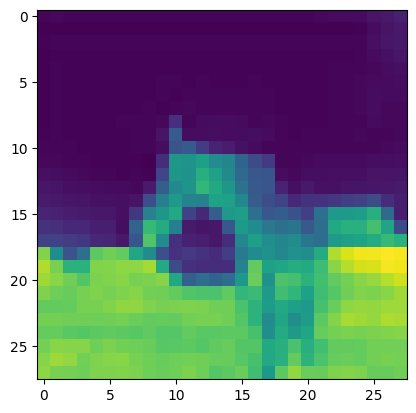

In [14]:
n = 30 
plt.imshow(x_test[n])
predicted_value = model.predict(x_test)
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))